<h1><center><font color='blue'> Preparación de datos </font></center></h1>

## Objetivo


Cargar imágenes y manipularlas para el entrenamiento usando ImageDataGenerator.


## Tabla de contenido

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1.  <a href="#item21">Descargar datos</a>
2.  <a href="#item22">Importar librerías y paquetes</a>  
3.  <a href="#item23">Construir una instancia de ImageDataGenerator</a>  
4.  <a href="#item24">Visualizar lotes de imágenes</a>
5.  <a href="#item25">Preguntas</a>  
    </font>
        

</div>


<a id="item1"></a>


<a id='item21'></a>


## Descargar datos


In [2]:
## get the data
#!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip
    
import urllib.request
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip'
filename = 'concrete_data_week2.zip'
urllib.request.urlretrieve(url, filename)    
    


('concrete_data_week2.zip', <http.client.HTTPMessage at 0x23cf890c850>)

Ahora en su directorio debe ver un archivo _concrete_data_week2.zip_. Lo descomprimimos:


In [3]:
#!unzip concrete_data_week2.zip

import zipfile
with zipfile.ZipFile('concrete_data_week2.zip', 'r') as zip_ref:
    zip_ref.extractall()

Ahora verá la carpeta _concrete_data_week2_, si abre la misma verá 2 carpetas: _Positive_ y _Negative_. Son las mismas que en el laboratorio anterior.


<a id='item22'></a>


## Importando librerías y paquetes


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator

Puede chequear el contenido de <code>./concrete_data_week2</code> ejecutando:


In [ ]:
!ls ./concrete_data_week2

o ejecutando:


In [5]:
os.listdir('concrete_data_week2')

['.DS_Store', 'Negative', 'Positive']

<a id='item23'></a>


## Construir una instancia de ImageDataGenerator


Definamos una variable que representará el camino al archivo conteniendo nuestros datos:


In [6]:
dataset_dir = './concrete_data_week2'

Keras ImageDataGenerator requiere que las imágenes estén arregladas en una determinada jerarquía de carpetas, donde el directorio principal contiene una cantidad de carpetas iguales al número de clases en su problema, que en este caso es 2. Esto ya está hecho, en una carpeta están las imágenes negativas y en otra las positivas.


Definamos una instancia de Keras ImageDataGenerator. 


#### Standard ImageDataGenerator


Se define de forma estándar como sigue, donde simplemente usaremos ImageDataGenerator para entrenar el modelo en lotes.


In [59]:
# instantiate your image data generator
data_generator = ImageDataGenerator()

Luego usará los métodos <code>flow_from_directory</code> para iterar a través de las imágenes en lotes. En este método pasa el directorio donde residen las imágenes, el tamaño de cada lote _batch_size_, y ya que los lotes son muestreados aleatoriamente, también puede especificar una semilla aleatoria, _seed_, en caso de querer reproducir el muestreo. Si quiere cambiar el tamaño de sus imágenes puede lograrlo a través del argumento _target_size_.


In [60]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


Lo que es genial acerca de este método es que imprime un resume de lo encontrado en el directorio que se le pasa. Aquí encuentra 40.000 imágenes pertenecientes a 2 clases.


Para acceder a los lotes, puede usar el método next como sigue:


In [61]:
first_batch = image_generator.next()
first_batch

(array([[[[151., 149., 150.],
          [153., 151., 152.],
          [155., 153., 154.],
          ...,
          [153., 149., 148.],
          [153., 149., 148.],
          [153., 149., 148.]],
 
         [[152., 150., 151.],
          [154., 152., 153.],
          [156., 154., 155.],
          ...,
          [154., 150., 149.],
          [154., 150., 149.],
          [154., 150., 149.]],
 
         [[153., 151., 152.],
          [155., 153., 154.],
          [156., 154., 155.],
          ...,
          [156., 152., 151.],
          [156., 152., 151.],
          [156., 152., 151.]],
 
         ...,
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [139., 135., 136.],
          [142., 138., 139.],
          [145., 141., 142.]],
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [140., 136., 137.],
          [142., 138., 139.],
          [146., 142., 143.

Esto devuelve las imágenes junto con sus etiquetas. Para retornar solamente las imágenes hacemos:


In [44]:
first_batch_images = image_generator.next()[0]
first_batch_images

array([[[[172., 174., 169.],
         [176., 178., 173.],
         [181., 183., 178.],
         ...,
         [157., 159., 154.],
         [156., 158., 153.],
         [154., 156., 151.]],

        [[170., 172., 167.],
         [172., 174., 169.],
         [174., 176., 171.],
         ...,
         [155., 157., 152.],
         [154., 156., 151.],
         [153., 155., 150.]],

        [[169., 171., 166.],
         [167., 169., 164.],
         [166., 168., 163.],
         ...,
         [152., 154., 149.],
         [152., 154., 149.],
         [151., 153., 148.]],

        ...,

        [[153., 154., 148.],
         [155., 156., 150.],
         [158., 159., 153.],
         ...,
         [143., 144., 138.],
         [144., 145., 139.],
         [145., 146., 140.]],

        [[147., 148., 142.],
         [150., 151., 145.],
         [153., 154., 148.],
         ...,
         [142., 143., 137.],
         [143., 144., 138.],
         [144., 145., 139.]],

        [[141., 142., 136.],
       

y lo siguiente retorna solamente las etiquetas:


In [45]:
first_batch_labels = image_generator.next()[1]
first_batch_labels


unique, counts = np.unique(first_batch_labels, return_counts=True)
dict(zip(unique, counts))



{0.0: 4, 1.0: 4}

#### ImageDataGenerator personalizado


También puede especificar algunas transformaciones, escalado, rotaciones que le gustaría aplicar a las imágenes cuando define un objeto ImageDataGenerator.
Si por ejemplo quisiese normalizar las imágenes puede hacer lo siguiente:

In [12]:
# instantiate your image data generator
data_generator = ImageDataGenerator(
    rescale=1./255
)

Y luego procede definiendo su _image_generator_ usando el método _flow_from_directory_ como antes.

In [13]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


Ahora exploramos el primer lote usando el método _next_.


In [14]:
first_batch = image_generator.next()
first_batch

(array([[[[0.5921569 , 0.58431375, 0.5882353 ],
          [0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          ...,
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ]],
 
         [[0.59607846, 0.5882353 , 0.5921569 ],
          [0.6039216 , 0.59607846, 0.6       ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375]],
 
         [[0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ]],
 
         ...,
 
         [[0.5568628 , 0.54901963, 0.56078434],
          [0.55686

vemos que los valores ya no son enteros, sino que fueron escalados dividiendo el número original por 255.


Puede aprender más acerca de la clase Keras ImageDataGeneration [aquí](https://keras.io/preprocessing/image?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0321EN-SkillsNetwork-20647850&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0321EN-SkillsNetwork-20647850&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<a id='item24'></a>


## Visualizando lotes de imágenes


Visualicemos un lote. Usaremos subplots.


Recuerde que podemos acceder a nuestros lotes como sigue:

<code>first_batch_images = image_generator.next()[0] # first batch</code>

<code>second_batch_images = image_generator.next()[0] # second batch</code>

y así sucesivamente:


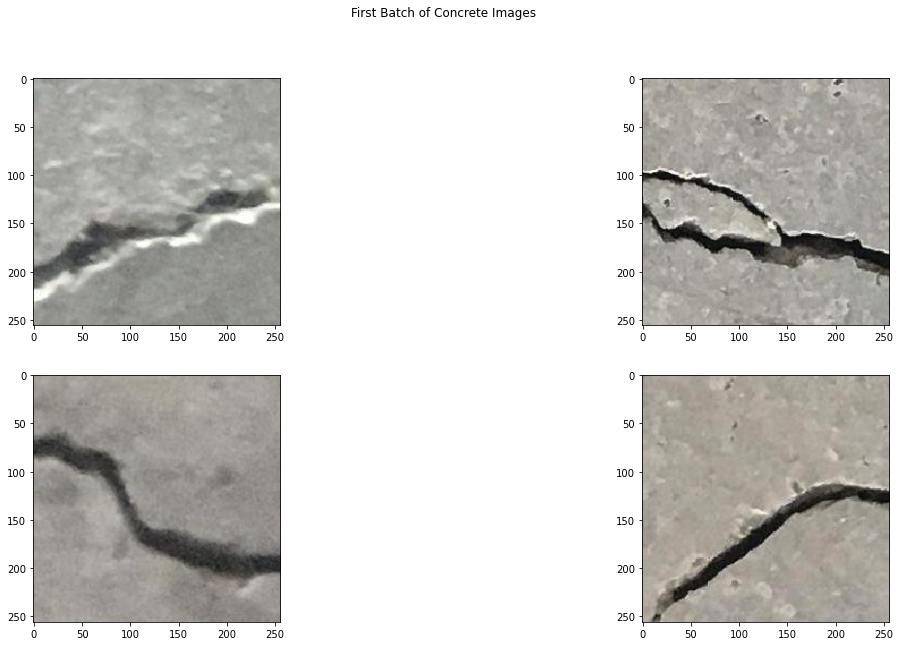

In [46]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

Recuerde que los lotes son muestreados aleatoriamente. En el primero terminamos con 2 imágenes positivas y 2 negativas.


**Nota** Debido a un bug en la función imshow de Matplotlib, si está graficando imágenes RGB sin escalar, el código debe ser: 

image_data = first_batch_images[ind].astype(np.uint8)

donde image_data es convertida a uint8 antes de llamar a la función <code>imshow</code>.


<a id='item25'></a>


## Preguntas


### Visualizar las imágenes del tercer lote


In [62]:
# obtengo los lotes

second_batch = image_generator.next()
third_batch = image_generator.next()
fourth_batch = image_generator.next()
fifth_batch = image_generator.next()



second_batch_images = second_batch[0]
second_batch_labels = second_batch[1]
third_batch_images = third_batch[0]
third_batch_labels = third_batch[1]
fourth_batch_images = fourth_batch[0]
fourth_batch_labels = fourth_batch[1]
fifth_batch_images = fifth_batch[0]
fifth_batch_labels = fifth_batch[1]



In [48]:
second_batch_images == third_batch_images

array([[[[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [False, False, False],
         [False, False, False]],

        ...,

        [[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [Fa

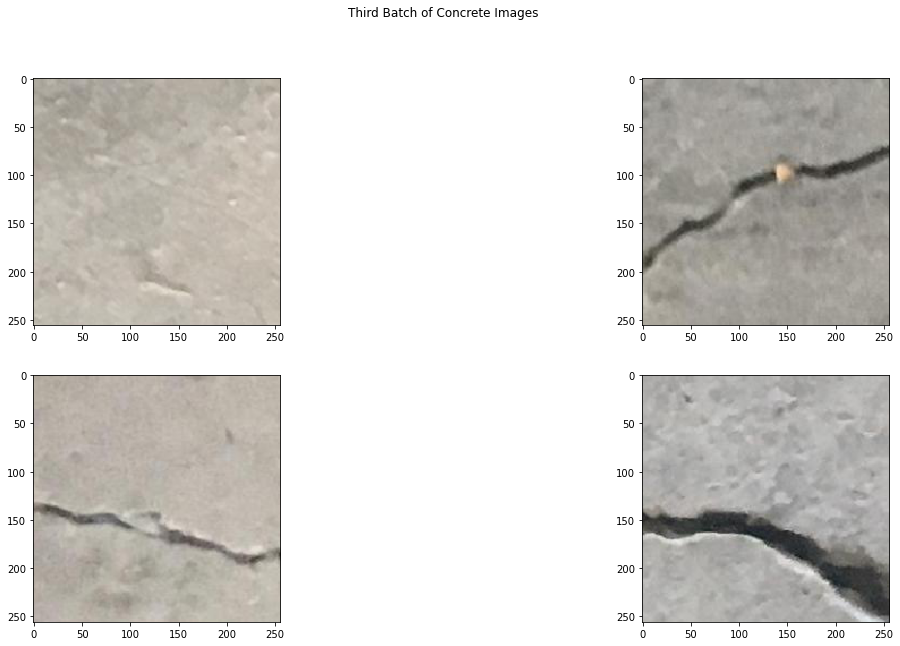

In [63]:
## You can use this cell to type your code to answer the above question
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = third_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('Third Batch of Concrete Images') 
plt.show()




### Imágenes de cada clase en el cuarto lote


In [82]:
## You can use this cell to type your code to answer the above question
#type(fourth_batch_images)
#fourth_batch_images.shape # (4, 256, 256, 3)

#fourth_batch_images[1]

unique, counts = np.unique(fourth_batch_labels, return_counts=True)
dict(zip(unique, counts))

#fourth_batch_labels.shape
fourth_batch_labels[:,0]


#fourth_batch_labels


array([1., 0., 0., 0.], dtype=float32)

### Visualizar imágenes en el quinto lote


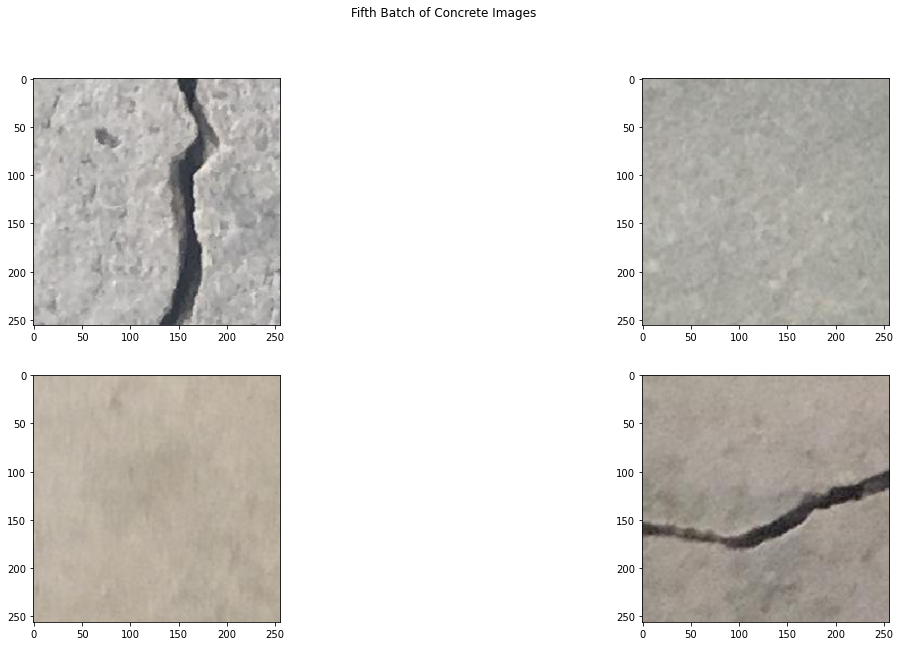

In [65]:
## You can use this cell to type your code to answer the above question

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = fifth_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('Fifth Batch of Concrete Images') 
plt.show()




### Imágenes de cada clase en el quinto lote


In [72]:
## You can use this cell to type your code to answer the above question

fifth_batch_labels


aux = fifth_batch_labels[1:]


unique, counts = np.unique(aux, return_counts=True)
dict(zip(unique, counts))


fifth_batch_labels



array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

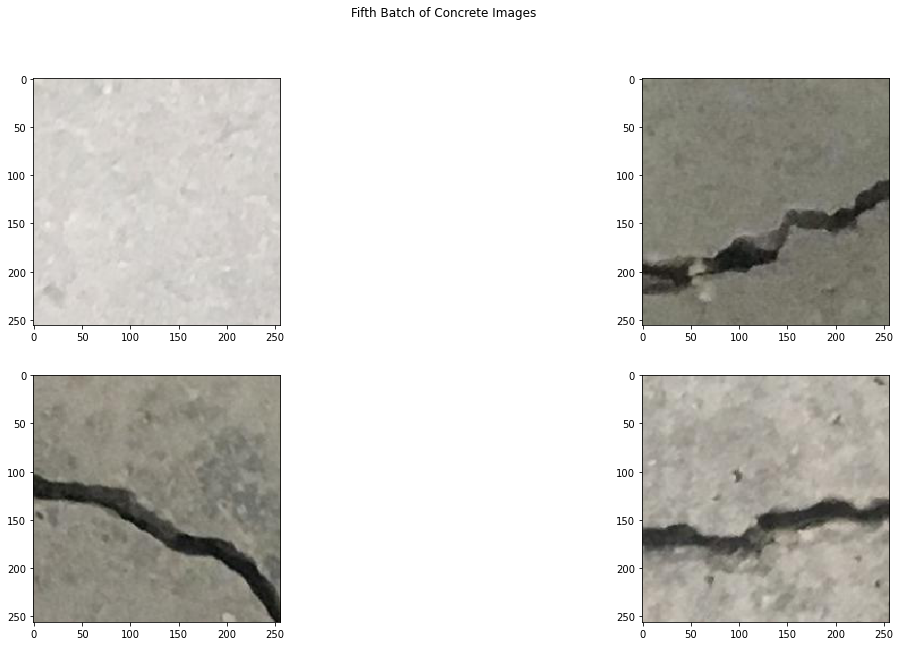

In [75]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = fourth_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('Fifth Batch of Concrete Images') 
plt.show()